# Import

In [1]:
import nii_io as nio
import nii_utils as utils
import nii_settings as nst
import nii_MDV as mdv
import numpy as np
from sklearn.mixture import GMM
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, axes, sci
from IPython.display import display, Image #Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

# Settings

In [2]:
proj_dir = "."
nii_dir = "./brainNii"
nii_segm_dir = "./brainNii/segmentation"
nii_settings_name = "settings.json"
nii_data_name = "patterns.json"
nii_histogram_name = "histogram.json"
nii_output_dir = "./brainNii/output"

extensions = ['.nii']
patch_side = 3 # considering square pathces

settings = utils.loadDict(proj_dir,nii_settings_name)
if settings == None:
    settings = nst.createSettings(nii_dir,extensions)
utils.saveDict(proj_dir,nii_settings_name,settings)
    
data = utils.loadDict(proj_dir,nii_data_name) # load data 
data = {} if data == None else data

print 'sampled data size'
print '3x3x3 patterns 2 bits per pixel = 54 bits per pattern'
print 'numeber of patter sampled: ' + `len(data.keys())`
print 'total size of pattern sampled: ' + `((len(data.keys())* 54) / 8) /1024` + ' Kbytes'

print settings

sampled data size
3x3x3 patterns 2 bits per pixel = 54 bits per pattern
numeber of patter sampled: 1237648
total size of pattern sampled: 8158 Kbytes
{'todo_dirlist': ['AD-7.nii'], 'done_dirlist': ['AD-1.nii', 'CTRL-10.nii', 'CONV-30.nii', 'NOCONV-50.nii', 'NOCONV-10.nii', 'CTRL-5.nii'], 'thress': {'AD-7.nii': [0.1253376906090581, 0.32831875008302286, 0.5264969822905372, 1.0485159228165726]}}


# Starting sampling

In [3]:
sample = utils.loadDict(proj_dir,nii_data_name)
if sample == None:
    print "sample not present, will be created."
    sample = {}
else:
    print "sample present."
    
if sample == {}:
    samplers = {}
    for img_name in settings['todo_dirlist']:
        samplers[img_name]=  mdv.sampler(3,settings['thress'][img_name]) 
    for img_name in settings['todo_dirlist']:
        image_data_and_metadata = (nio.basicLoadNii(utils.joinpath(nii_dir,img_name)))
        %time curr_sample = samplers[img_name].sample3D(image_data_and_metadata[2],verbose=True)
        sample = mdv.mergedicts(curr_sample,sample)
    utils.saveDict(proj_dir,nii_data_name,sample)

sample present.


# Now create the histogram 

Use the binnedHistogram class create the density mapping.
Binning is very simple right now but might be usefull to use more redifined bins.

CPU times: user 3.44 s, sys: 80 ms, total: 3.52 s
Wall time: 3.45 s


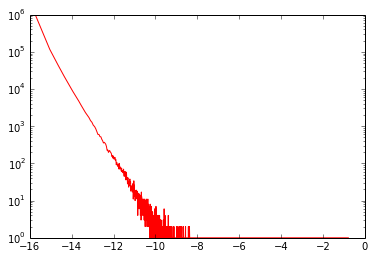

In [17]:
precision_=0.001
%time binnedHist = mdv.binnedHistogram(precision=precision_, fun=np.log,mapkv=sample)
plt.plot(binnedHist.X, binnedHist.Y, '-r')
plt.yscale('log')
plt.show()

# Create the pattern bank

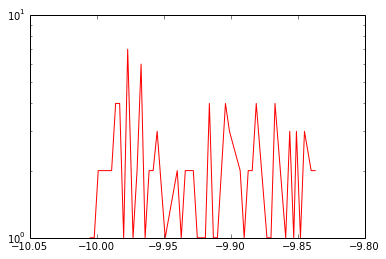

100


In [22]:
W = 0.05
N = 100

maxim = mdv.Maximizator(W,N)
patternbank = maxim.maxim(binnedHist)
patternbank_bins = mdv.binnedHistogram(precision=precision_, fun=np.log,
                                     mapkv=patternbank,isMap=True)
plt.plot(patternbank_bins.X, patternbank_bins.Y, '-r')
plt.yscale('log')
plt.show()

pattern_list = []
for patt_bin in patternbank_bins.MAP.values() :
    pattern_list += patt_bin
        
print len(pattern_list)

